In [1]:
# Step 1: Reading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import datetime as dt
import sklearn
import statsmodels    # libraries to build a model 
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
country_data=pd.read_csv(r"E:\Masters in Data Science\PCA\Assignment\Country-data.csv",encoding= 'unicode_escape') ## Reading the dataset

In [3]:
country_data.head() # Browse the data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_data.shape  ## fetching number of rows and columns

(167, 10)

In [6]:
country_data.info()  # fetch data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
## Null values analysis
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### There are no Null values present in the dataframe

In [8]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Visualisation:


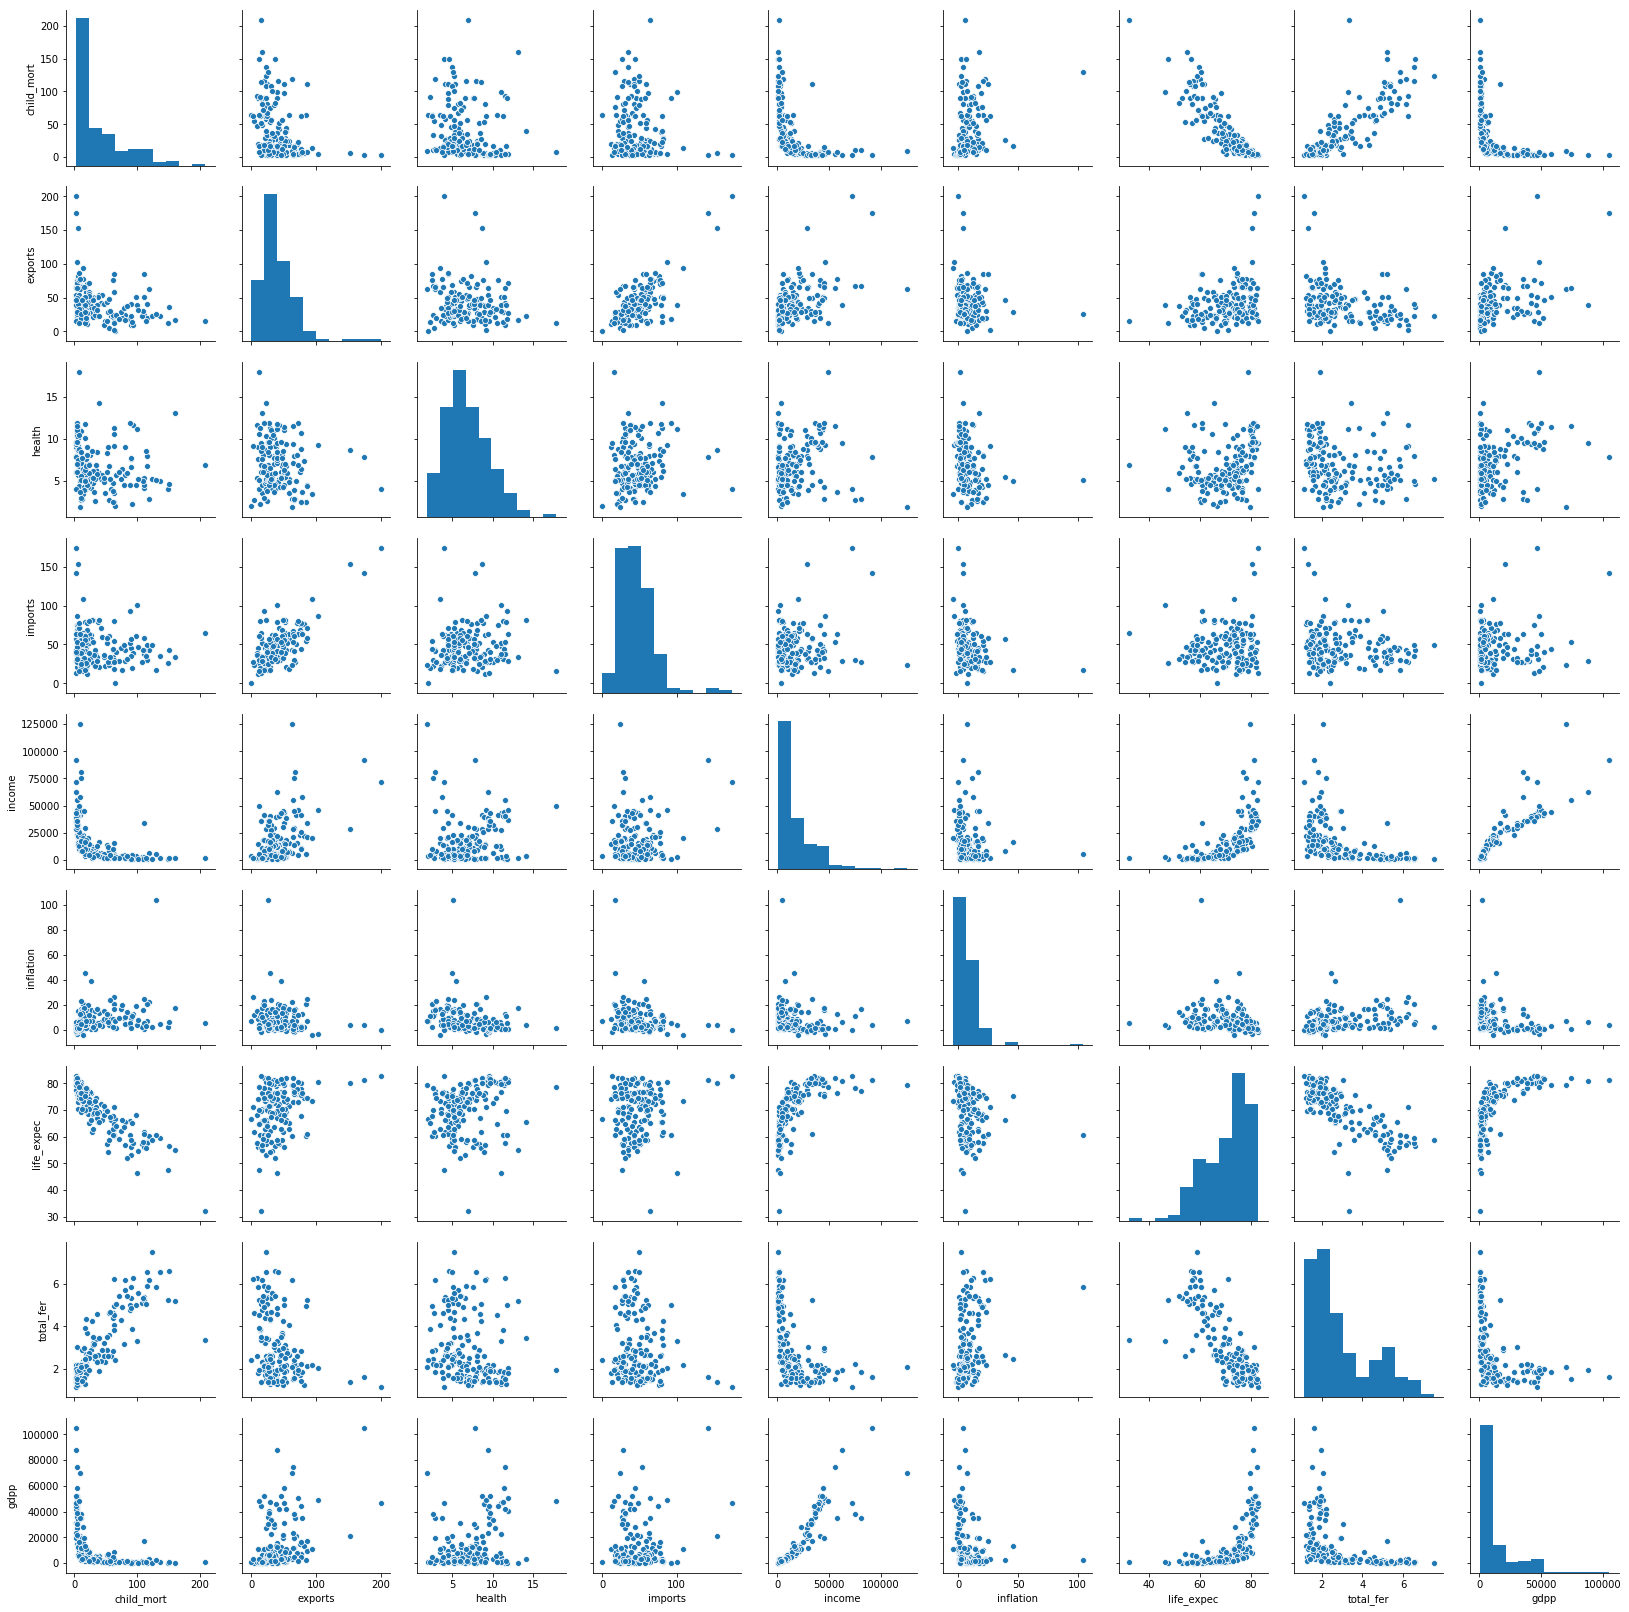

In [47]:
sns.pairplot(country_data)
plt.show()

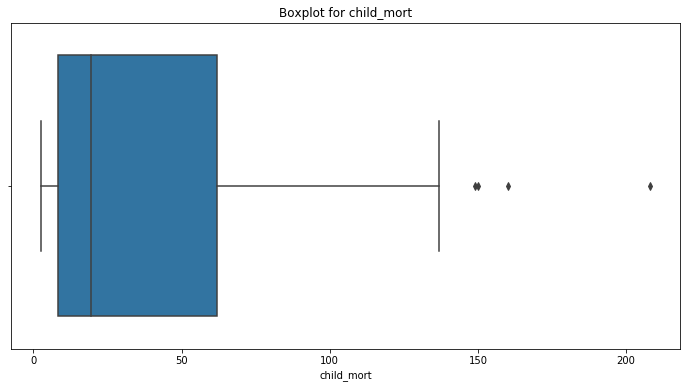

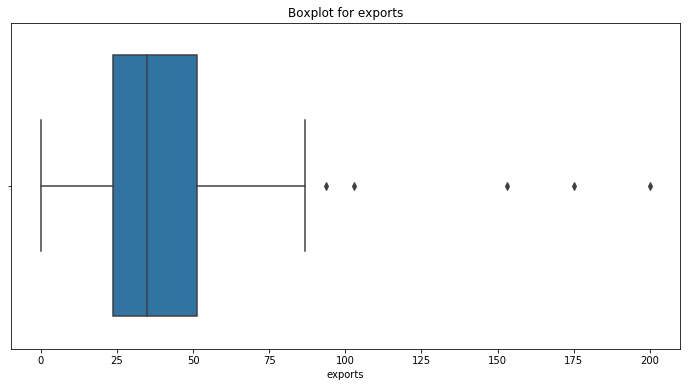

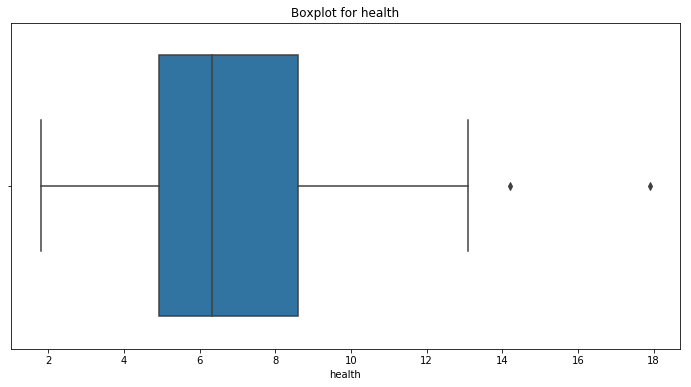

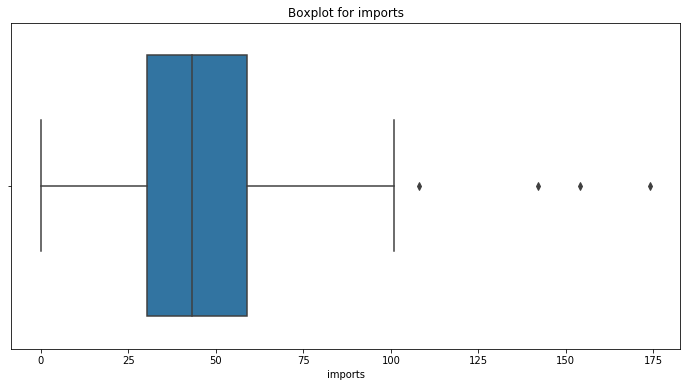

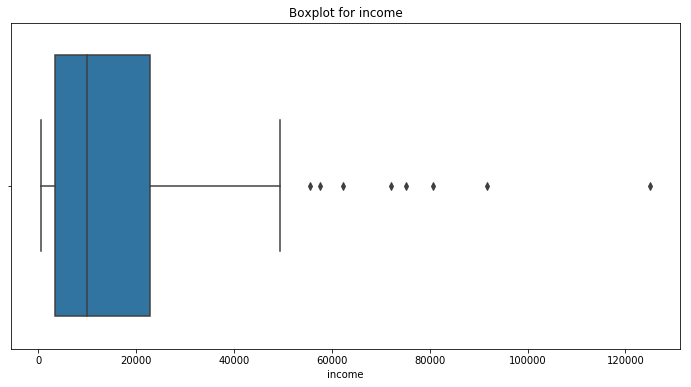

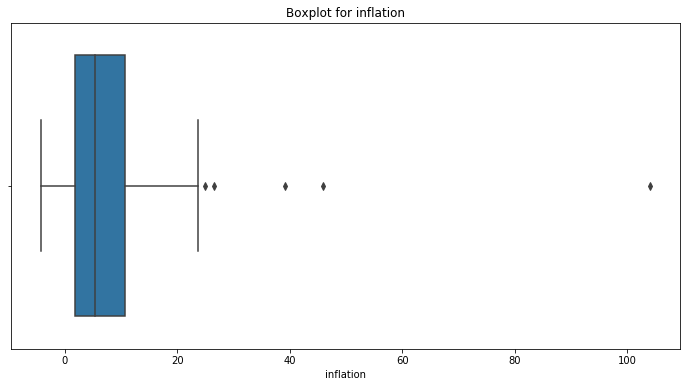

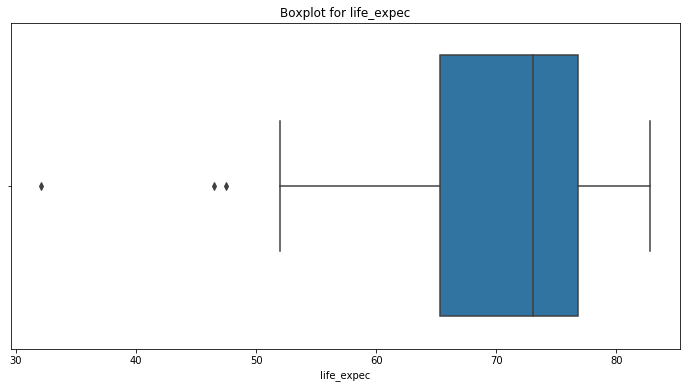

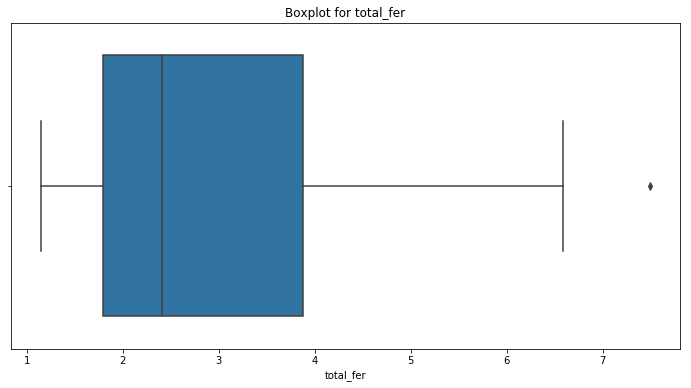

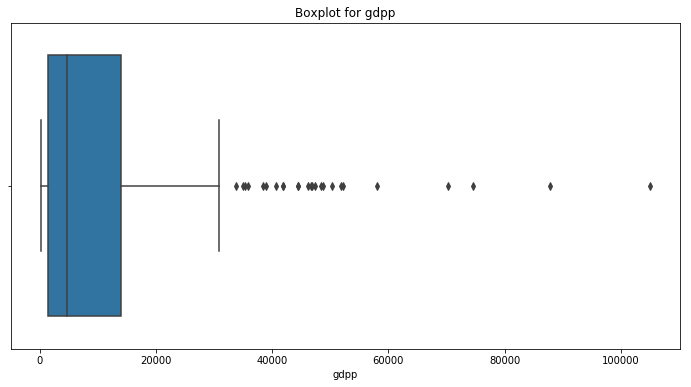

In [51]:
# Box plot - Outlier Analysis:
df_numeric = country_data[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]  ## This is the dataframe having only numerical variables

for i in df_numeric:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_numeric[i])
    plt.title("Boxplot for {0}".format(i))

## From this boxplot, We can find few columns having Outlier which are
    GDPP
    Inflation
    Income
### From the analysis of the dataframe, it seems to be alright because in real scenario we know that few coutries like USA and China are having much higher GDP as compared to other countries and it should not be considered as outlier. Same is the case for Income and Inflation. We will not remove any data from the dataframe and cosider entire data for the PCA and clustering analysis.

### PCA - 
    To perform PCA, we need to standardize the data so that all variables are in the same range

In [9]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
# data into Standard normal form
# Create new dataframe numericals
df = country_data[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]

In [12]:
normalized_df=(df-df.mean())/df.std()
country_data1 = country_data.drop(['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp'], 1)
country_data1 = pd.concat([country_data1,normalized_df],axis=1)
country_data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


### Entire data is in standard normal form - Now we will run PCA

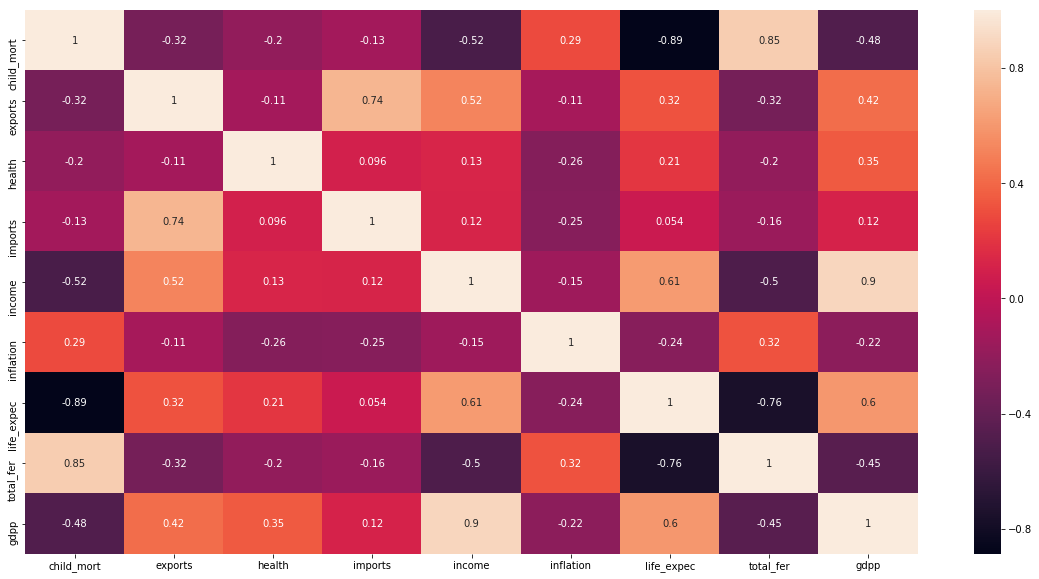

In [13]:
# correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(country_data1.corr(),annot = True)

#### From this Correlation matrix it is observed that few variables are highly inter-correlated:
    total_fer - Child_mortality
    Income - GDP
    Exports - Imports
    life expectancy - income

In [15]:
# PCA
from sklearn.decomposition import PCA

In [16]:
pca = PCA(random_state=42)

In [20]:
country_data1=country_data1.drop(['country'],1)

In [21]:
pca.fit(country_data1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

<BarContainer object of 9 artists>

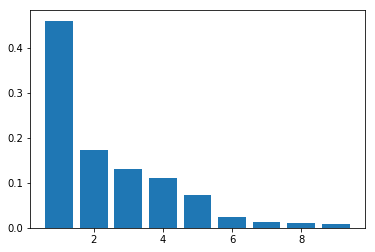

In [35]:
#Variances on bar plot
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [23]:
#scree plot for explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

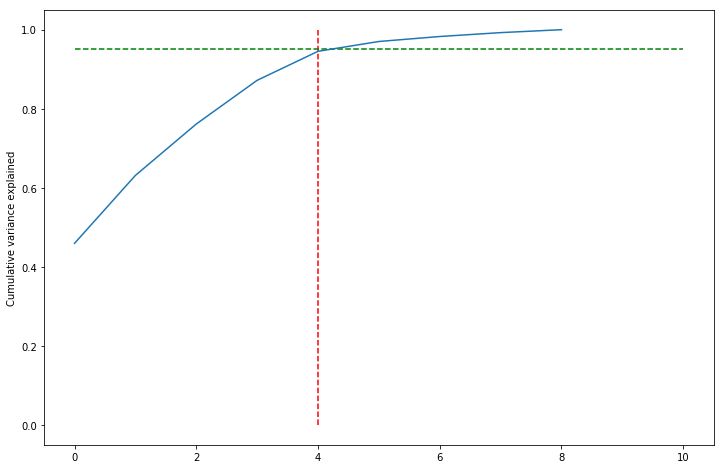

In [41]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=10, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [27]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [28]:
country_pca = pca_final.fit_transform(country_data1)
country_pca.shape

(167, 4)

In [30]:
corrmat = np.corrcoef(country_pca.transpose())

In [31]:
corrmat.shape

(4, 4)

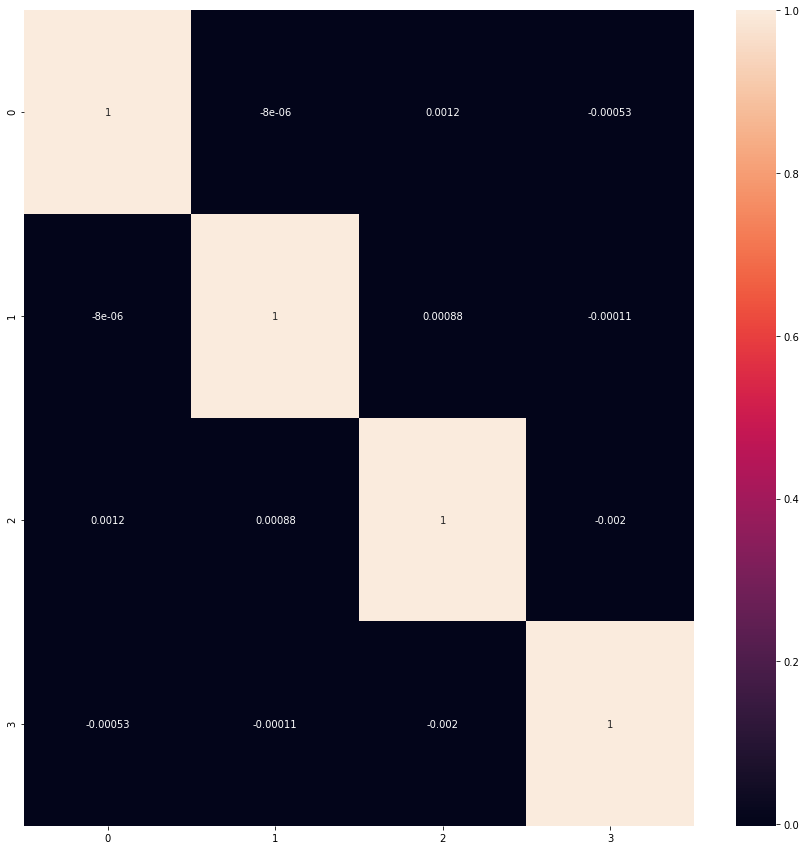

In [32]:
# heatmap -correlation matrix
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

## There are no correlation between these 4 variables
    
        
        

In [36]:
pc2 = PCA(n_components=4, random_state=42)

In [37]:
country_newdata = pc2.fit_transform(country_data1)

In [38]:
country_newdata

array([[-2.90428986e+00,  9.53338565e-02, -7.15965211e-01,
         1.00224038e+00],
       [ 4.28622238e-01, -5.86392077e-01, -3.32485546e-01,
        -1.15757715e+00],
       [-2.84369828e-01, -4.53809569e-01,  1.21784212e+00,
        -8.65511455e-01],
       [-2.92362976e+00,  1.69047094e+00,  1.52047089e+00,
         8.37107392e-01],
       [ 1.03047668e+00,  1.36248937e-01, -2.25044091e-01,
        -8.44522763e-01],
       [ 2.23400732e-02, -1.77385167e+00,  8.67388423e-01,
        -3.68560213e-02],
       [-1.01279137e-01, -5.66547817e-01,  2.41365901e-01,
        -1.46186915e+00],
       [ 2.33514161e+00, -1.98249674e+00,  1.89773440e-01,
         1.10172431e+00],
       [ 2.96484681e+00, -7.32485689e-01, -5.18207833e-01,
         1.20182758e+00],
       [-1.80942807e-01, -4.01657877e-01,  8.64857661e-01,
        -4.37457319e-01],
       [ 1.26493953e+00, -6.54619578e-01, -4.86634051e-01,
         5.54667376e-02],
       [ 1.66598590e+00,  5.59479843e-01,  9.88286008e-01,
      

In [39]:
country_newdata.shape

(167, 4)

In [143]:

df_pca = pd.DataFrame(country_newdata, columns=["PC1", "PC2","PC3", "PC4"])
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.904290,0.095334,-0.715965,1.002240
1,0.428622,-0.586392,-0.332486,-1.157577
2,-0.284370,-0.453810,1.217842,-0.865511
3,-2.923630,1.690471,1.520471,0.837107
4,1.030477,0.136249,-0.225044,-0.844523


In [144]:
df_pca.shape

(167, 4)

In [145]:
df = df_pca.copy()

### Now we will verify if this PCA data is good for clustering or not. We will use Hopkins measure to calculate the score

In [ ]:
# Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [257]:
#Hopkins measure
hopkins(df_pca)

0.8326921385326592

### We have got Hopkins measure score of 83.26% which is very good score for clustering. We will proceed with the clustering part using K-means and Hierarchichal methods.

## This is the PCA modified dataframe having top four variables explaining 95% of variances, we will use this dataset for running clustering.

## df is the dataset we will use for Clustering analysis using
#  Method 1 - K-Means Algorithm


In [53]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 3, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

## We will find out the optimal number of clusters using Elbow curve

In [56]:
ssd = []
numof_cluster = [2,3,4,5,6,7,8]
for num_cluster in numof_cluster:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

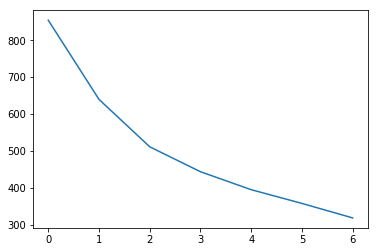

In [57]:
plt.plot(ssd)

## We will select number of optimum clusters as 4. Because increasing number of clusters may decrease the business information  

### We will also perform Silhouette Analysis to identify the optimum number of clusters

In [59]:
for num_cluster in numof_cluster:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(df)
    # silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For num_cluster = {0}, the Silhouette Score is {1}".format(num_cluster, silhouette_avg))

For num_cluster = 2, the Silhouette Score is 0.32244656378352543
For num_cluster = 3, the Silhouette Score is 0.334085952458005
For num_cluster = 4, the Silhouette Score is 0.35221708432935944
For num_cluster = 5, the Silhouette Score is 0.2847544754414339
For num_cluster = 6, the Silhouette Score is 0.2930544213006891
For num_cluster = 7, the Silhouette Score is 0.2576385909310686
For num_cluster = 8, the Silhouette Score is 0.2748422929108069



    - 
#Final Model building using number of clusters = 4
    

In [60]:
# Final model building with K=3
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [62]:
# Assign the label to the PCA dataframe -> df
df.head()

,PC1,PC2,PC3,PC4
0,-2.904290,0.095334,-0.715965,1.002240
1,0.428622,-0.586392,-0.332486,-1.157577
2,-0.284370,-0.453810,1.217842,-0.865511
3,-2.923630,1.690471,1.520471,0.837107
4,1.030477,0.136249,-0.225044,-0.844523


In [95]:
df['cluster_id']=kmeans.labels_
df.head()

,PC1,PC2,PC3,PC4,cluster_id,Country
0,-2.904290,0.095334,-0.715965,1.002240,0,Afghanistan
1,0.428622,-0.586392,-0.332486,-1.157577,1,Albania
2,-0.284370,-0.453810,1.217842,-0.865511,1,Algeria
3,-2.923630,1.690471,1.520471,0.837107,0,Angola
4,1.030477,0.136249,-0.225044,-0.844523,1,Antigua and Barbuda


In [96]:
df1 = df.copy()

In [97]:
df1['Country']=country_data['country'].values

In [98]:
df1

,PC1,PC2,PC3,PC4,cluster_id,Country
0,-2.904290,0.095334,-0.715965,1.002240,0,Afghanistan
1,0.428622,-0.586392,-0.332486,-1.157577,1,Albania
2,-0.284370,-0.453810,1.217842,-0.865511,1,Algeria
3,-2.923630,1.690471,1.520471,0.837107,0,Angola
4,1.030477,0.136249,-0.225044,-0.844523,1,Antigua and Barbuda
5,0.022340,-1.773852,0.867388,-0.036856,1,Argentina
6,-0.101279,-0.566548,0.241366,-1.461869,1,Armenia
7,2.335142,-1.982497,0.189773,1.101724,2,Australia
8,2.964847,-0.732486,-0.518208,1.201828,2,Austria
9,-0.180943,-0.401658,0.864858,-0.437457,1,Azerbaijan


In [184]:
df1.to_excel(r"E:\Masters in Data Science\PCA\Assignment\Country_data_Cluster.xlsx")

### Now we have created Cluster dataframe based on PCA analysis and divided entire dataset into 4 clusters
#### Now we will divide the dataset into four different categories based on different cluster values and analyse the Cluster

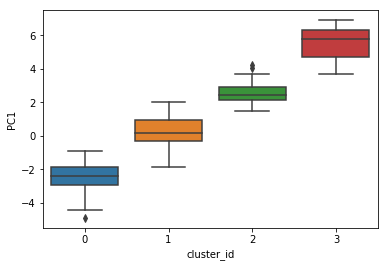

In [77]:
sns.boxplot(x='cluster_id',y='PC1',data=df1)

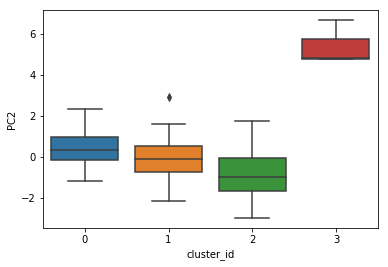

In [78]:
sns.boxplot(x='cluster_id',y='PC2',data=df1)

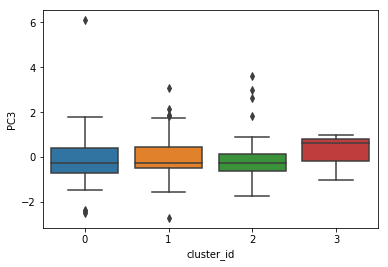

In [79]:
sns.boxplot(x='cluster_id',y='PC3',data=df1)

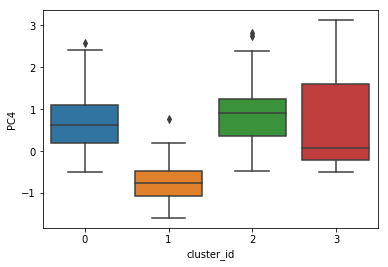

In [80]:
sns.boxplot(x='cluster_id',y='PC4',data=df1)

### Plotting the number of countries under each cluster

Text(0, 0.5, 'Number of country')

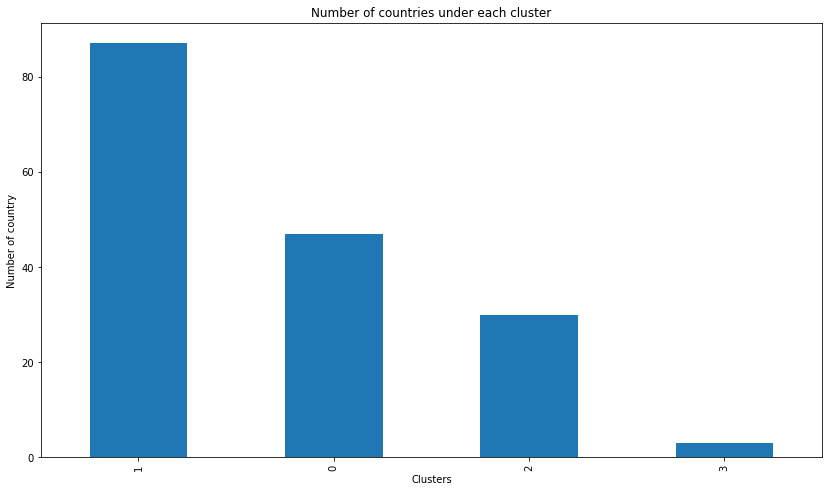

In [112]:
ax = df1['cluster_id'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of countries under each cluster")
ax.set_xlabel("Clusters")
ax.set_ylabel("Number of country")

## Here Cluster 1 has highest number of countries 87 whereas Cluster 0 has 48 followed by Cluster 2 with 30 and Cluster 3 only 3 countries.
    Cluster 0 = 48
    Cluster 1 = 87
    Cluster 2 = 29
    Cluster 3 = 3

    We will further divide our countries list based on these three cluster

In [100]:
cluster0 = df1['cluster_id']==0
df_cluster0 = df1[cluster0]

In [101]:
df_cluster0

,PC1,PC2,PC3,PC4,cluster_id,Country
0,-2.904290,0.095334,-0.715965,1.002240,0,Afghanistan
3,-2.923630,1.690471,1.520471,0.837107,0,Angola
17,-2.664301,0.416918,-0.256597,0.277837,0,Benin
21,-0.879443,0.455997,-0.582880,0.404943,0,Botswana
25,-3.112692,0.038659,-0.454384,1.077676,0,Burkina Faso
26,-2.890278,-0.421396,-1.343373,1.816012,0,Burundi
28,-2.799489,0.078413,-0.341933,0.541927,0,Cameroon
31,-3.953075,0.385460,-0.322587,0.915547,0,Central African Republic
32,-3.546888,1.285263,-0.102707,1.204783,0,Chad
36,-2.087279,0.342571,-0.327397,-0.118591,0,Comoros


In [102]:
cluster1 = df1['cluster_id']==1
df_cluster1 = df1[cluster1]
df_cluster1

,PC1,PC2,PC3,PC4,cluster_id,Country
1,0.428622,-0.586392,-0.332486,-1.157577,1,Albania
2,-0.284370,-0.453810,1.217842,-0.865511,1,Algeria
4,1.030477,0.136249,-0.225044,-0.844523,1,Antigua and Barbuda
5,0.022340,-1.773852,0.867388,-0.036856,1,Argentina
6,-0.101279,-0.566548,0.241366,-1.461869,1,Armenia
9,-0.180943,-0.401658,0.864858,-0.437457,1,Azerbaijan
10,1.264940,-0.654620,-0.486634,0.055467,1,Bahamas
11,1.665986,0.559480,0.988286,-0.206460,1,Bahrain
12,-1.120481,-0.958515,0.525036,-1.193612,1,Bangladesh
13,1.078132,-0.480524,-0.662363,-0.520938,1,Barbados


In [104]:
cluster2 = df1['cluster_id']==2
df_cluster2 = df1[cluster2]
df_cluster2

,PC1,PC2,PC3,PC4,cluster_id,Country
7,2.335142,-1.982497,0.189773,1.101724,2,Australia
8,2.964847,-0.732486,-0.518208,1.201828,2,Austria
15,3.134359,0.661558,-0.643293,1.091615,2,Belgium
23,2.452710,0.016405,3.010785,0.774511,2,Brunei
29,2.536003,-1.721916,-0.395093,1.332844,2,Canada
42,2.167935,-0.004497,0.256548,-0.310921,2,Cyprus
44,3.001465,-0.862953,-0.334745,1.781864,2,Denmark
53,2.451587,-1.072916,-0.100138,0.896632,2,Finland
54,2.247511,-1.861041,-0.709853,1.226317,2,France
58,2.663412,-1.269791,-0.654203,1.122617,2,Germany


In [105]:
cluster3 = df1['cluster_id']==3
df_cluster3 = df1[cluster3]
df_cluster3

,PC1,PC2,PC3,PC4,cluster_id,Country
91,6.897012,4.835301,0.998833,3.120258,3,Luxembourg
98,3.668509,4.751197,-1.018251,-0.499605,3,Malta
133,5.766035,6.662054,0.652458,0.089369,3,Singapore


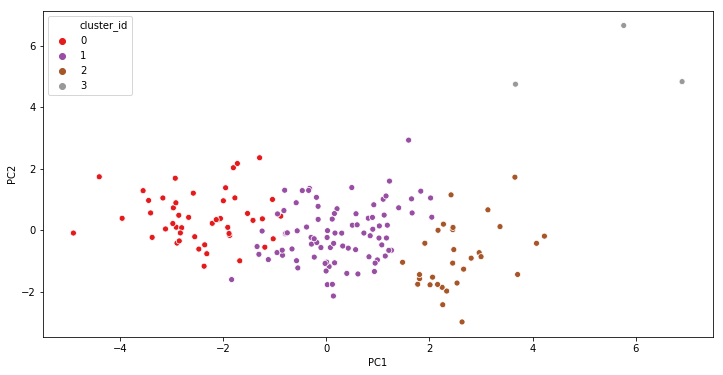

In [202]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PC1',y ='PC2',hue = 'cluster_id',data = df1, palette = 'Set1')

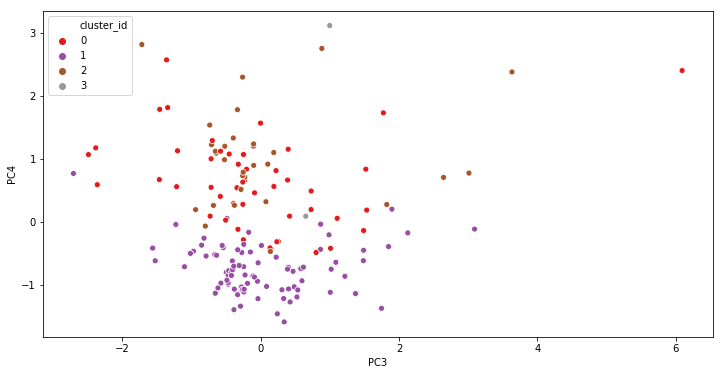

In [203]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PC3',y ='PC4',hue = 'cluster_id',data = df1, palette = 'Set1')

In [209]:
df1.rename(columns={'Country':'country'},inplace=True)

In [215]:
country_cluster=pd.merge(country_data, df1[['country','cluster_id']], on='country')

In [217]:
country_cluster.head()  ## Final dataset created with clusters

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [219]:
country_cluster[['income','child_mort','gdpp','cluster_id']].groupby('cluster_id').mean()

,income,child_mort,gdpp
cluster_id,,,
0,3942.404255,92.961702,1922.382979
1,12968.620690,21.389655,6919.103448
2,45250.000000,4.953333,43333.333333
3,64033.333333,4.133333,57566.666667


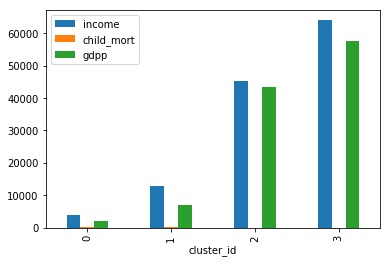

In [220]:
### Now we will plot this in bar plot 
country_cluster[['income','child_mort','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')

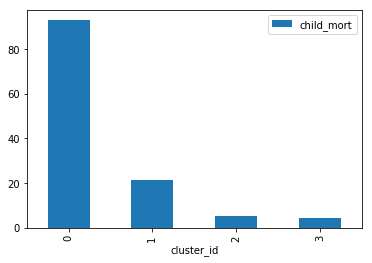

In [221]:
### Now we will plot this in bar plot 
country_cluster[['child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind='bar') ## Plotting Child_mortality separately as it was not visible in previous plot

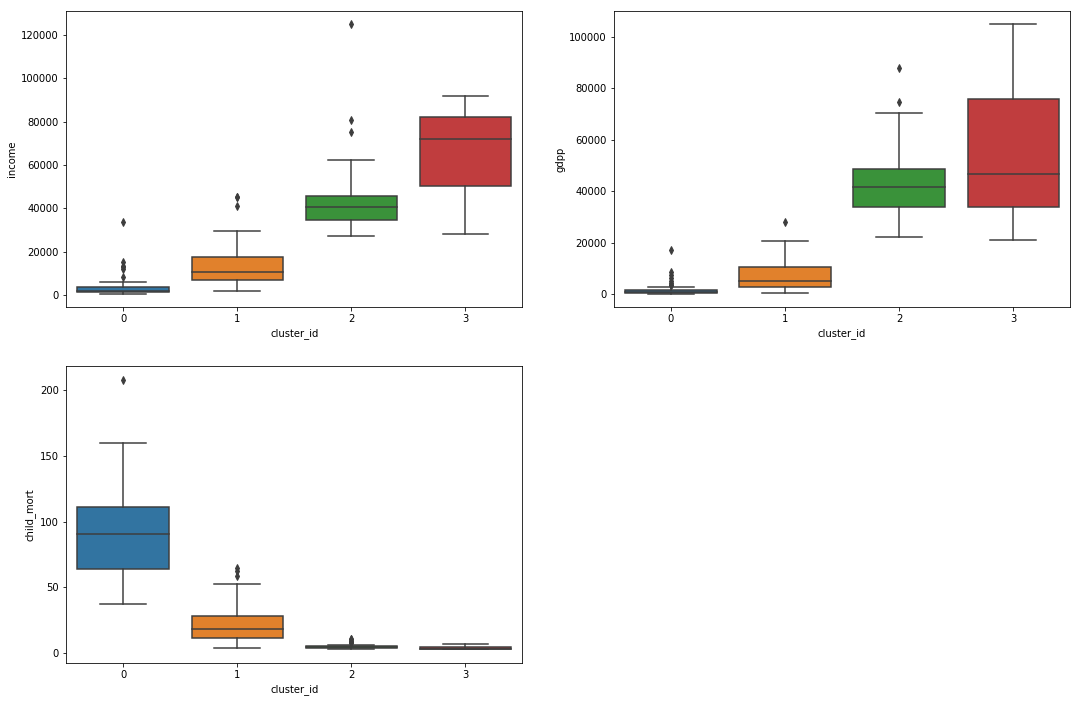

In [225]:
## Now we will plot box plot for Income, gdpp and child_mort
plt.figure(figsize=(18, 12))
var = ['income','gdpp','child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x='cluster_id',y=i[1],data = country_cluster)

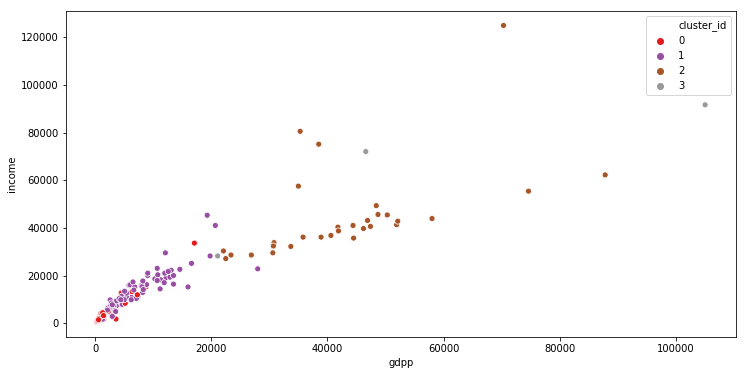

In [248]:
# Income Vs GDPP 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='gdpp',y ='income',hue = 'cluster_id',data = country_cluster, palette = 'Set1')

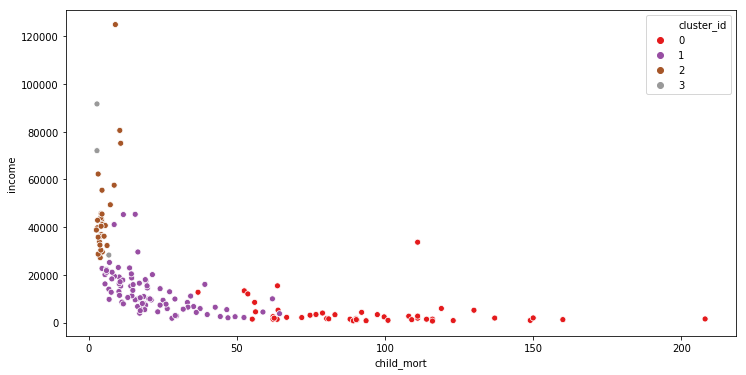

In [249]:
#Income Vs Child_Mort
plt.figure(figsize=(12, 6))
sns.scatterplot(x='child_mort',y ='income',hue = 'cluster_id',data = country_cluster, palette = 'Set1')

# Inferences extracted using K-Means
### From this clustering analysis, we have clustered the data into four groups. And from further analysis this clustering is explained as below:
    Cluster 0 - It includes nations which under developed and affeted by terrorism or polictically unstable. such as African countries, Afghanistan etc. These countries also have lowest income and GDP among others and also higher child mortality.
    Cluster 1 - This cluster includes countries which are developing countries like India, China, Brazil, Thailand, Malaysia etc. These countries have moderate Income and GDP and also child mortality is lesser thatn Cluster 0 countries.
    Cluster 2 - This cluster includes all developed nations and having higher GDP and Income. Countries are USA, Australia, Canada, European countries etc. These countries have lowest child mortality rate.
    Cluster 3 - This cluster includes only three countries which are Luxemburg, Singapore and Malta. These coutries are having very small geographical area and highest per capita gdp.

In [186]:
ssd = []
numof_cluster = [2,3,4,5,6,7,8,9,10,11,12]
for num_cluster in numof_cluster:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

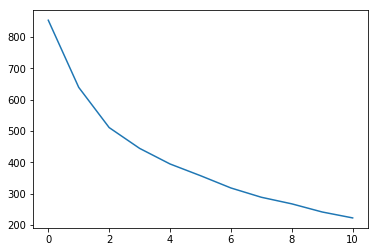

In [187]:
plt.plot(ssd)

In [188]:
#Silhouette score
for num_cluster in numof_cluster:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For num_cluster = {0}, the Silhouette Score is {1}".format(num_cluster, silhouette_avg))

For num_cluster = 2, the Silhouette Score is 0.32244656378352543
For num_cluster = 3, the Silhouette Score is 0.334085952458005
For num_cluster = 4, the Silhouette Score is 0.3549131449906334
For num_cluster = 5, the Silhouette Score is 0.28327048979311437
For num_cluster = 6, the Silhouette Score is 0.27682339794515737
For num_cluster = 7, the Silhouette Score is 0.2513761358356588
For num_cluster = 8, the Silhouette Score is 0.2838232765966261
For num_cluster = 9, the Silhouette Score is 0.26906287351965297
For num_cluster = 10, the Silhouette Score is 0.2817197391969373
For num_cluster = 11, the Silhouette Score is 0.2650185415101684
For num_cluster = 12, the Silhouette Score is 0.28708098909620144


### From elbow curve and silhouette analysis we will take this time number of clusters as 8 so that we can narrow down the countries list

In [190]:

df.head()
kmeans = KMeans(n_clusters=8, max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [191]:
df2 = df.copy()
df2['cluster_id']=kmeans.labels_
df2.head()

,PC1,PC2,PC3,PC4,cluster_id
0,-2.904290,0.095334,-0.715965,1.002240,1
1,0.428622,-0.586392,-0.332486,-1.157577,0
2,-0.284370,-0.453810,1.217842,-0.865511,2
3,-2.923630,1.690471,1.520471,0.837107,1
4,1.030477,0.136249,-0.225044,-0.844523,0


In [192]:
df2['Country']=country_data['country'].values

In [194]:
df2.head()
df2.to_excel(r"E:\Masters in Data Science\PCA\Assignment\Country_data_Cluster8.xlsx")

Text(0, 0.5, 'Number of country')

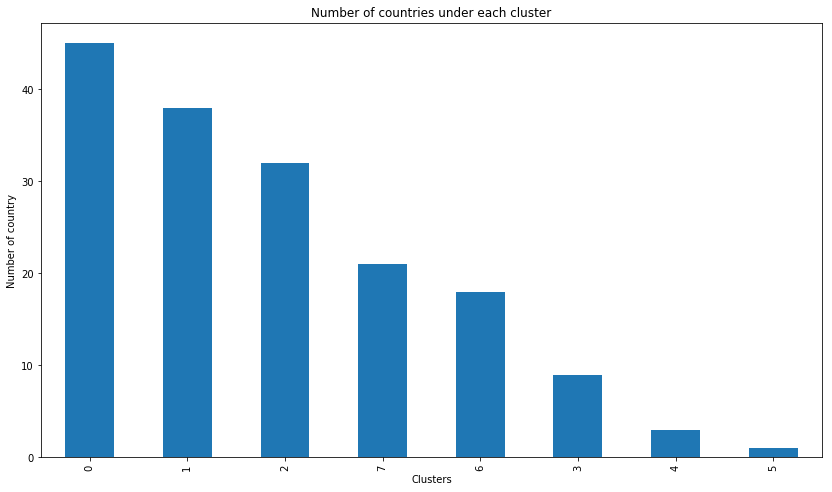

In [195]:
ax = df2['cluster_id'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of countries under each cluster")
ax.set_xlabel("Clusters")
ax.set_ylabel("Number of country")

### We will add Income, Child Mortality and GDP to this dataframe to understand the clustering and also select at least 10 countries based on these parameters

In [196]:
df2['Income']=country_data['income'].values
df2['child_mort']=country_data['child_mort'].values
df2['gdpp']=country_data['gdpp'].values

## Browse the final dataframe having all key attributes

In [197]:
df2.head()

,PC1,PC2,PC3,PC4,cluster_id,Country,Income,child_mort,gdpp
0,-2.904290,0.095334,-0.715965,1.002240,1,Afghanistan,1610,90.2,553
1,0.428622,-0.586392,-0.332486,-1.157577,0,Albania,9930,16.6,4090
2,-0.284370,-0.453810,1.217842,-0.865511,2,Algeria,12900,27.3,4460
3,-2.923630,1.690471,1.520471,0.837107,1,Angola,5900,119.0,3530
4,1.030477,0.136249,-0.225044,-0.844523,0,Antigua and Barbuda,19100,10.3,12200


In [239]:
df2.rename(columns={'Country':'country'}, inplace = True)

In [240]:
country_df2=pd.merge(country_data, df2[['country','cluster_id']], on='country')
country_df2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,6
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,6
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,2


In [241]:
country_df2[['income','child_mort','gdpp','cluster_id']].groupby('cluster_id').mean()

,income,child_mort,gdpp
cluster_id,,,
0,17550.888889,11.786667,10402.000000
1,2825.868421,99.234211,1331.105263
2,11755.000000,29.096875,5690.562500
3,65388.888889,6.644444,53877.777778
4,64033.333333,4.133333,57566.666667
5,5150.000000,130.000000,2330.000000
6,37555.555556,4.327778,41044.444444
7,6099.047619,41.838095,3119.714286


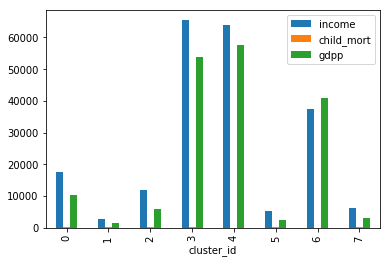

In [242]:

country_df2[['income','child_mort','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')

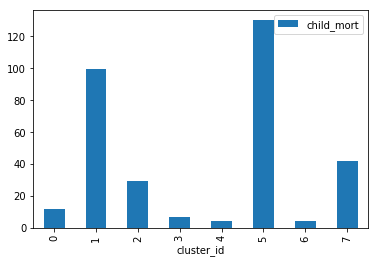

In [244]:
 
country_df2[['child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind='bar') 

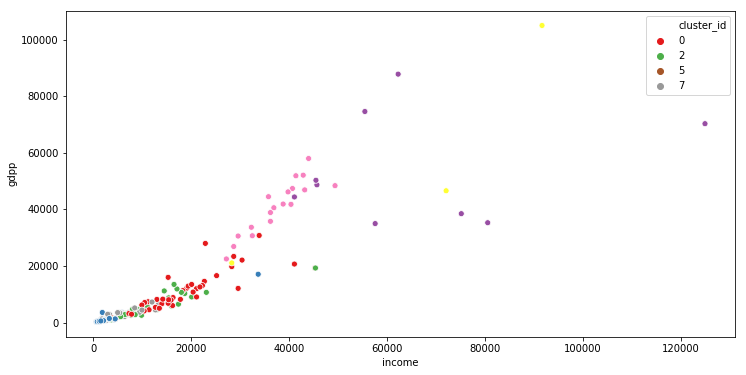

In [251]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='income',y ='gdpp',hue = 'cluster_id',data = country_df2, palette = 'Set1')

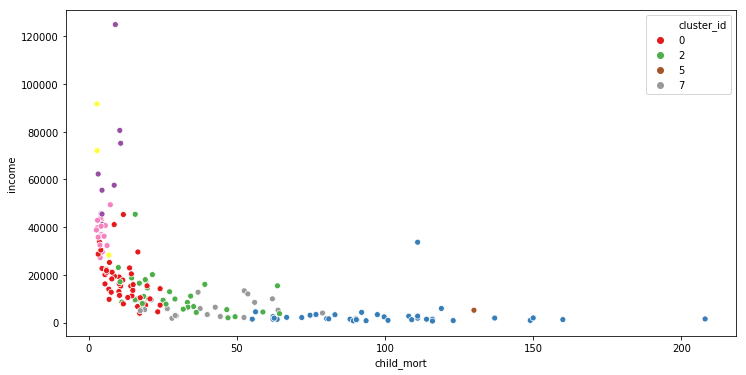

In [252]:
### Plotting Income Vs child_mort for all clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='child_mort',y ='income',hue = 'cluster_id',data = country_df2, palette = 'Set1')

## Now we have increased the number of clusters to create more categories so that we can narrow down the countries based on Income, GDP and child_mort
    
    Cluster 0(45) - This cluster includes moderate income, gdp and child mortality 
    Cluster 1(38) - This cluster includes poor or under-developed countries and having very high child mortality and very low income. Example: Haiti, Mali, Niger, Burundi, Central Africa, Congo, Mozambique
    Cluster 2(32) - It includes all developing countries like India, Brazil, Philippine etc
    Cluster 3(9) - Countries are having highest income and low child_mortality. e.g. USA, Kuwait, Norway, Switzerland
    Cluster 4(3) - Again this cluster includes countries like Singapore, Malta and Luxemburg. same as when no of clusters were 4. This cluster has countries which are having smallest geographical areas which highest GDP and Income.
    Cluster 5(1) - This cluster has only one country - Nigeria. which is exception because it has avg income and gdp but also very high child mortality rate.
    Cluster 6(18) - This cluster include all developed countries with Income less than 50K. e.g. European countries, Australia, Canada, Japan etc
    Cluster 7(21) - This cluster has countries with moderate GDP, Income and child-Mortality
    

# Method 2 - Hierarchical Clustering

In [113]:

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [146]:

df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.904290,0.095334,-0.715965,1.002240
1,0.428622,-0.586392,-0.332486,-1.157577
2,-0.284370,-0.453810,1.217842,-0.865511
3,-2.923630,1.690471,1.520471,0.837107
4,1.030477,0.136249,-0.225044,-0.844523


In [147]:

mergings=linkage(df_pca, method='single', metric='euclidean')

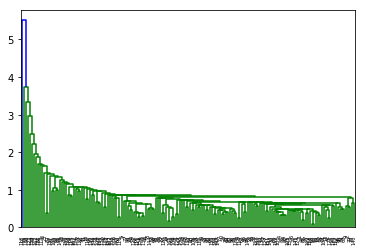

In [148]:
dendrogram(mergings)
plt.figsize=(14,8)
plt.show()


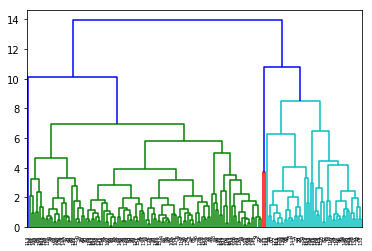

In [149]:

mergings=linkage(df_pca, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

#### Now this plot is something better than single linkage. We will cut this tree at cluster = 4

In [166]:

cut_tree(mergings, n_clusters=4).shape

(167, 1)

In [167]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1,)

In [168]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [169]:
df_hi = df_pca.copy()
df_hi['cluster_labels']=cluster_labels

In [170]:
df_hi.head()

,PC1,PC2,PC3,PC4,cluster_labels
0,-2.904290,0.095334,-0.715965,1.002240,0
1,0.428622,-0.586392,-0.332486,-1.157577,0
2,-0.284370,-0.453810,1.217842,-0.865511,0
3,-2.923630,1.690471,1.520471,0.837107,0
4,1.030477,0.136249,-0.225044,-0.844523,0


### Plotting the number of countries per Cluster

Text(0, 0.5, 'Number of country')

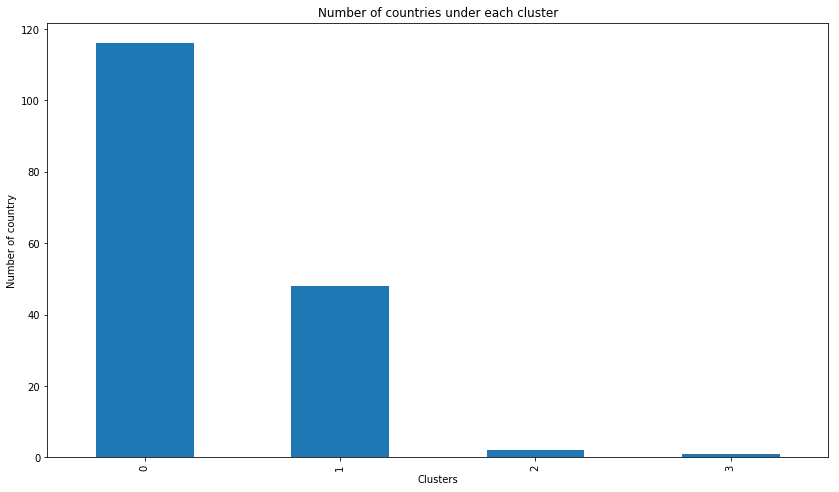

In [171]:
ax = df_hi['cluster_labels'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of countries under each cluster")
ax.set_xlabel("Clusters")
ax.set_ylabel("Number of country")

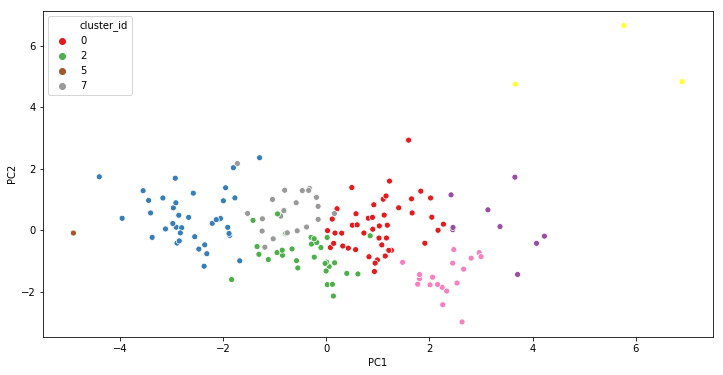

In [206]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PC1',y ='PC2',hue = 'cluster_id',data = df2, palette = 'Set1')

In [173]:

df_hi['Country'] = country_data['country'].values

In [207]:
df_hi.head()

,PC1,PC2,PC3,PC4,cluster_labels,Country
0,-2.904290,0.095334,-0.715965,1.002240,0,Afghanistan
1,0.428622,-0.586392,-0.332486,-1.157577,0,Albania
2,-0.284370,-0.453810,1.217842,-0.865511,0,Algeria
3,-2.923630,1.690471,1.520471,0.837107,0,Angola
4,1.030477,0.136249,-0.225044,-0.844523,0,Antigua and Barbuda


In [178]:
cluster0_hi = df_hi['cluster_labels']==0
df_hi_cluster0 = df_hi[cluster0_hi]
print(df_hi_cluster0['Country'].count())   ## Total number of rows in this cluster
df_hi_cluster0

116


,PC1,PC2,PC3,PC4,cluster_labels,Country
0,-2.904290,0.095334,-0.715965,1.002240,0,Afghanistan
1,0.428622,-0.586392,-0.332486,-1.157577,0,Albania
2,-0.284370,-0.453810,1.217842,-0.865511,0,Algeria
3,-2.923630,1.690471,1.520471,0.837107,0,Angola
4,1.030477,0.136249,-0.225044,-0.844523,0,Antigua and Barbuda
5,0.022340,-1.773852,0.867388,-0.036856,0,Argentina
6,-0.101279,-0.566548,0.241366,-1.461869,0,Armenia
9,-0.180943,-0.401658,0.864858,-0.437457,0,Azerbaijan
12,-1.120481,-0.958515,0.525036,-1.193612,0,Bangladesh
13,1.078132,-0.480524,-0.662363,-0.520938,0,Barbados


In [180]:
cluster1_hi = df_hi['cluster_labels']==1
df_hi_cluster1 = df_hi[cluster1_hi]
print(df_hi_cluster1['Country'].count()) 
df_hi_cluster1

48


,PC1,PC2,PC3,PC4,cluster_labels,Country
7,2.335142,-1.982497,0.189773,1.101724,1,Australia
8,2.964847,-0.732486,-0.518208,1.201828,1,Austria
10,1.264940,-0.654620,-0.486634,0.055467,1,Bahamas
11,1.665986,0.559480,0.988286,-0.206460,1,Bahrain
14,0.578286,0.533722,0.484770,-1.032171,1,Belarus
15,3.134359,0.661558,-0.643293,1.091615,1,Belgium
23,2.452710,0.016405,3.010785,0.774511,1,Brunei
29,2.536003,-1.721916,-0.395093,1.332844,1,Canada
42,2.167935,-0.004497,0.256548,-0.310921,1,Cyprus
43,2.047107,0.421929,-0.541706,-0.410501,1,Czech Republic


In [181]:
cluster2_hi = df_hi['cluster_labels']==2
df_hi_cluster2 = df_hi[cluster2_hi]
print(df_hi_cluster2['Country'].count())   

2


,PC1,PC2,PC3,PC4,cluster_labels,Country
91,6.897012,4.835301,0.998833,3.120258,2,Luxembourg
133,5.766035,6.662054,0.652458,0.089369,2,Singapore


In [182]:
cluster3_hi = df_hi['cluster_labels']==3
df_hi_cluster3 = df_hi[cluster3_hi]
print(df_hi_cluster3['Country'].count())  
df_hi_cluster3

1


,PC1,PC2,PC3,PC4,cluster_labels,Country
113,-4.897337,-0.094215,6.091837,2.405188,3,Nigeria


In [227]:
df_hi.rename(columns={'Country':'country'},inplace = True)

In [231]:

country_hi=pd.merge(country_data, df_hi[['country','cluster_labels']], on='country')

In [232]:
country_hi.head() 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [234]:
country_hi[['income','child_mort','gdpp','cluster_labels']].groupby('cluster_labels').mean()

,income,child_mort,gdpp
cluster_labels,,,
0,7783.818966,50.92931,4025.982759
1,37318.541667,7.24375,32168.125000
2,81900.000000,2.80000,75800.000000
3,5150.000000,130.00000,2330.000000


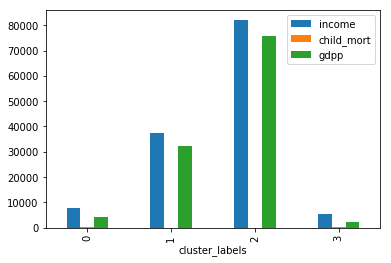

In [235]:

country_hi[['income','child_mort','gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar')

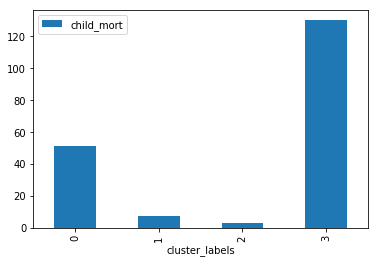

In [236]:

country_hi[['child_mort','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar') ## Plotting Child_mortality separately as it was not visible in previous plot

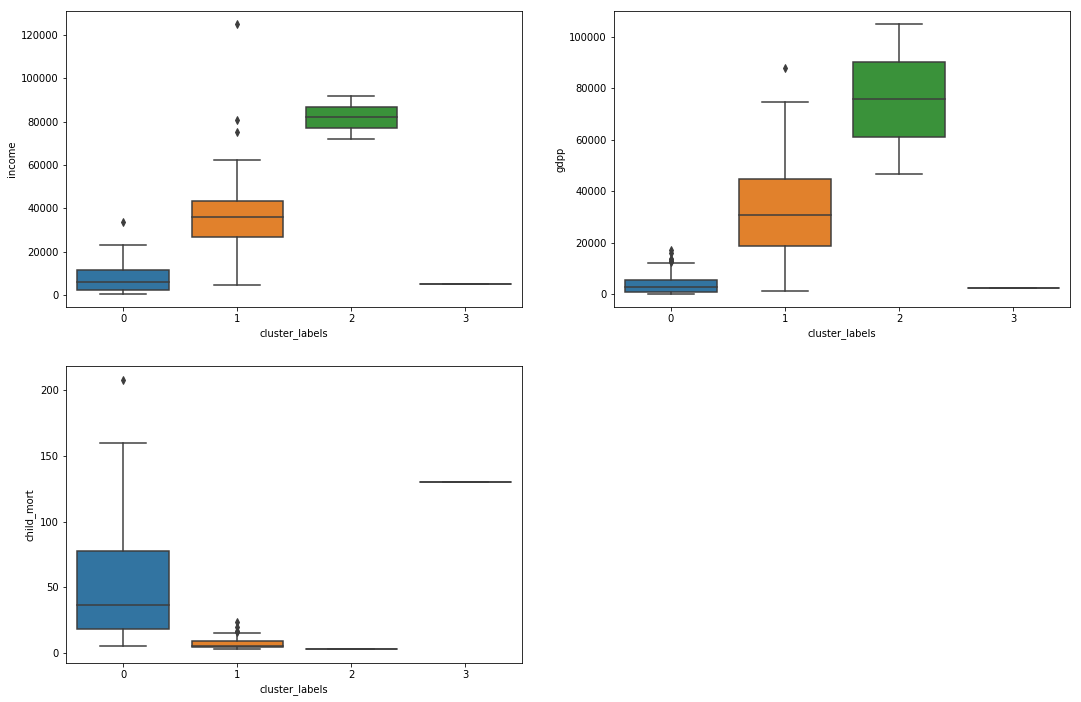

In [238]:

plt.figure(figsize=(18, 12))
var = ['income','gdpp','child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x='cluster_labels',y=i[1],data = country_hi)

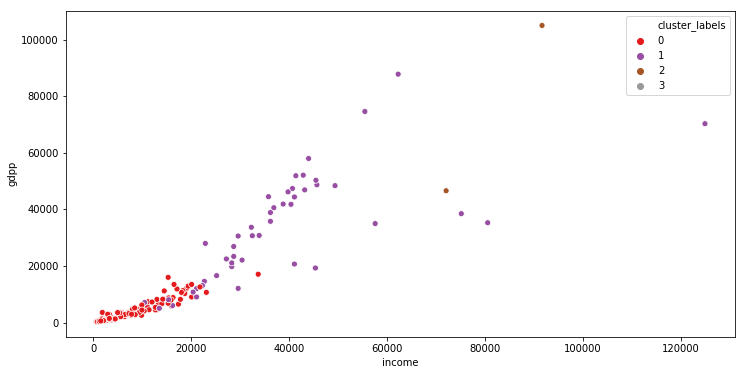

In [253]:
### Plotting Income Vs GDPP for all clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='income',y ='gdpp',hue = 'cluster_labels',data = country_hi, palette = 'Set1')

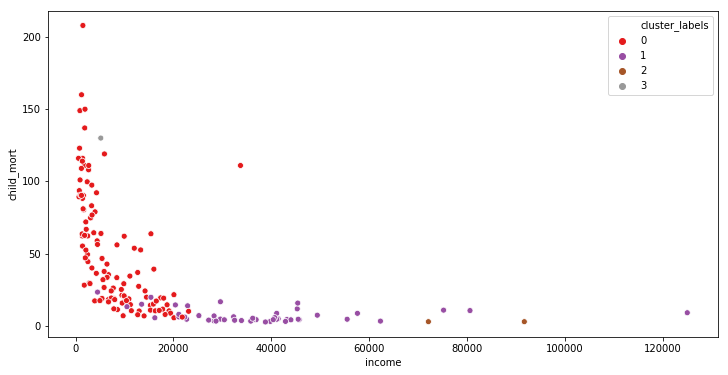

In [254]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='income',y ='child_mort',hue = 'cluster_labels',data = country_hi, palette = 'Set1')

### This hierarchichal clustering divides the data in four clusters which is something different from the K-Means
    1st Cluster: Total 116 rows   - This cluster includes all under-developed and developing countries like India, Afghanistan and other Asian and African countries
    2nd Cluster: Total 48 rows    - This cluster includes all developed countries like USA, Canada, Europe, UK etc
    3rd Cluster: Total 2 countries - Luxemburg and Singapore - this is similar to 4th Cluster of K-means
    4th Cluster: Only one country - Nigeria

### From both K-Means and Hierarchichal analysis, it is found that K-Means cluster the data in a better and more understanding way. It also looks easier to explain to business. Whereas latter technique can be difficult to explain. for example, Nigeria is only country put into one cluster and one cluster includes 116 countries. Which makes difficult to chose needy countries to provide the aide.


#### From 4 Cluster and 8 Cluster analysis of K-Means. We have found that 38 countries are common in cluster 0 of 4-cluster analysis and cluster 1 of 8-cluster analysis. These countries are worst affected in terms of economy, income and child mortality and should be considered for the Aide from the organization.
    Afghanistan
    Angola
    Benin
    Burkina Faso
    Burundi
    Cameroon
    Central African Republic
    Chad
    Comoros
    Congo, Dem. Rep.
    Cote d'Ivoire
    Equatorial Guinea
    Eritrea
    Gambia
    Ghana
    Guinea
    Guinea-Bissau
    Haiti
    Kenya
    Lesotho
    Liberia
    Madagascar
    Malawi
    Mali
    Mauritania
    Mozambique
    Niger
    Pakistan
    Rwanda
    Senegal
    Sierra Leone
    Sudan
    Tanzania
    Timor-Leste
    Togo
    Uganda
    Yemen
    Zambia
